In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
# <Read in the data file>
df = pd.read_csv('/Users/christinacho/Desktop/ML projects/Housing price project /data/housing.csv')

In [108]:
# <Data Dictionary> 

#1. longitude - a measure of how far west a house is(higher value is farther west)
#2. latitude - a measure of how far north a house is(higher value is farther north)
#3. housing_median_age - median age of a house within a block 
#4. total_rooms - total number of rooms within a block
#5. total_bedrooms - total number of bedrooms within a block 
#6. population - total number of people residing within a block
#7. households- total number of households for a block 
#8. median_income - median income for households within a block of houses(tens of thousands $)
#9. median_house_value - median house value for households within a block($)
#10.ocean_proximity - location of the house with respect to ocean/sea

In [109]:
# Objective of the project: Build an optimal machine learning model to predict the median housing price in any district in California, 
#                           given all the features 

In [110]:
# <Basic understanding of the data> 
df.info()

## The dataset consists of 20640 rows and 10 columns. All the features are numerical, except 'ocean_proximity'. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [111]:
df.isnull().sum()

## 'total_bedrooms' has 207 missing values. I will look into these values and handle them soon. 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [112]:
df.duplicated().sum()

## There are no duplicated rows in the dataset 

0

In [113]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [114]:
## Check the categories within 'ocean_proximity' feature 
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

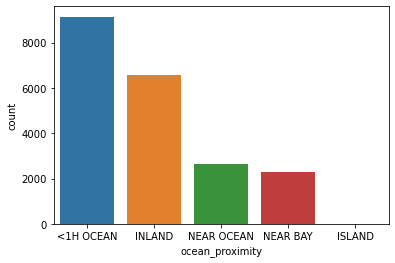

In [115]:
## Distribution of the categories within 'ocean_proximity' feature 

sns.countplot(data = df, x ='ocean_proximity', order = df['ocean_proximity'].value_counts().index)

In [116]:
## One-hot encoding for the categorical feature 'ocean_proximity'

df= pd.get_dummies(df, drop_first = True)

In [118]:
## Handle missing values 
## First, I tried to look into the missing values a bit more(quickly checked around ~150 missing values). 
## There did not seem to be any apparent patterns associated with the missing values.
df[df['total_bedrooms'].isnull()][0:50]
df[df['total_bedrooms'].isnull()][50:100]
df[df['total_bedrooms'].isnull()][100:150]
## I decided to fill in the null values by predicting them using the other features through a regression model. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,1,0,0,0
10216,-117.91,33.87,29.0,1121.0,NaN,762.0,276.0,2.5000,143800.0,0,0,0,0
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,157800.0,0,0,0,0
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0,0,0,0,0
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,357600.0,0,0,0,0
10428,-117.64,33.45,26.0,1528.0,NaN,607.0,218.0,6.2871,325500.0,0,0,0,1
10495,-117.66,33.51,18.0,2626.0,NaN,1302.0,522.0,4.0167,189600.0,0,0,0,0
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,0,0,0,0
10885,-117.92,33.70,15.0,3201.0,NaN,1510.0,622.0,4.2708,161700.0,0,0,0,0
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,177000.0,0,0,0,0


In [13]:
## Regression Imputation

null_rows= df[df['total_bedrooms'].isnull()].drop(['total_bedrooms'], axis = 1) 
## Created a dataframe that only contains the rows where the null values of 'total_bedrooms' were present. This dataframe does not 
## contain the column 'total_bedrooms'

In [14]:
df_without_null = df.dropna()

X = df_without_null.drop('total_bedrooms', axis =1)
y = df_without_null['total_bedrooms']  ## Here, the 'total_bedrooms' is the outcome column 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
## Tried to find the best model among Linear Regression, Random Forest, and Gradient Boosting to predict missing 'total_bedrooms' values. 

# Linear Regression
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
cv = cross_val_score(lin_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-70.77454091943999

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor 

RF_model = RandomForestRegressor()
cv = cross_val_score(RF_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-57.457627003090955

In [17]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor 

GB_model = GradientBoostingRegressor()
cv = cross_val_score(GB_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-53.384218497301106

In [18]:
## Gradient Boosting is chosen as the final model since it shows the lowest RMSE among the models compared. Thus, this model will be used 
## to predict the missing 'total_bedrooms' values. 

GB_model.fit(X,y)
filled_val = GB_model.predict(null_rows)

null_rows['total_bedrooms']= filled_val 
df = pd.concat([df.dropna(), null_rows]).reindex(df.index)


In [19]:
df.info() ## Now the missing values in 'total_bedrooms' have been filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  uint8  
 10  ocean_proximity_ISLAND      20640 non-null  uint8  
 11  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
dtypes: float64(9), uint8(4)
memory 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'ocean_proximity_INLAND'}>,
        <AxesSubplot:title={'center':'ocean_proximity_ISLAND'}>,
        <AxesSubplot:title={'center':'ocean_proximity_NEAR BAY'}>],
       [<AxesSubplot:title={'center':'ocean_proximity_NEAR OCEAN'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

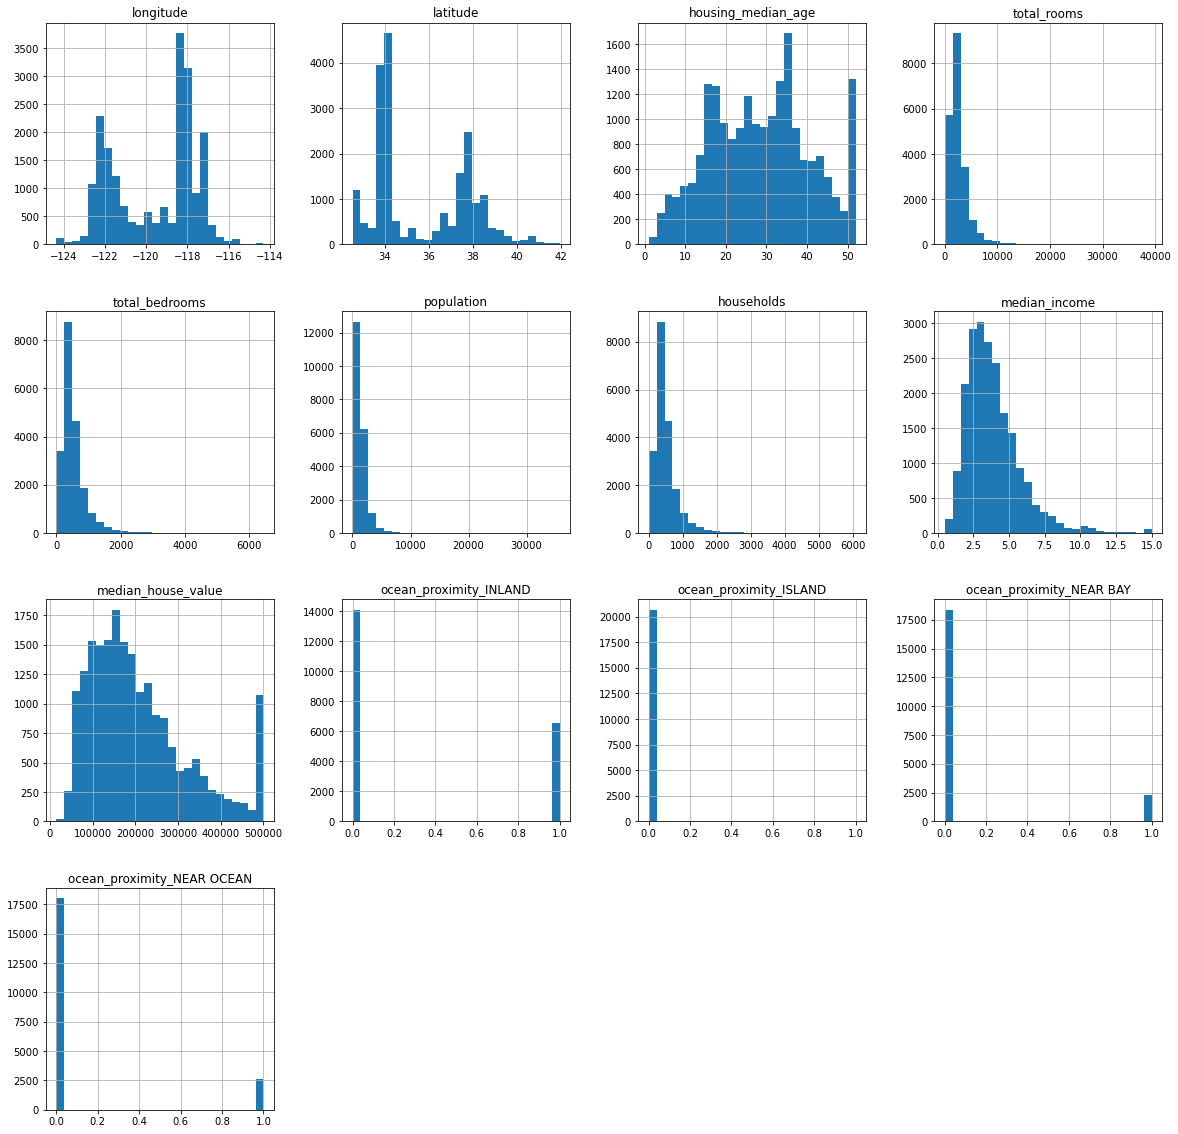

In [20]:
## Check the distribution of each feature 

df.hist(figsize=(20,20), bins = 26)
## Observations: It seems that the distributions of 'total_rooms', 'total_bedrooms', 'population', and 'households' are skewed. 

In [21]:
## Perform log transformation on the skewed features 

df[['total_rooms', 'total_bedrooms', 'population', 'households']] = df[['total_rooms', 'total_bedrooms', 'population', 'households']].apply(lambda x: np.log(x+1))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'ocean_proximity_INLAND'}>,
        <AxesSubplot:title={'center':'ocean_proximity_ISLAND'}>,
        <AxesSubplot:title={'center':'ocean_proximity_NEAR BAY'}>],
       [<AxesSubplot:title={'center':'ocean_proximity_NEAR OCEAN'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

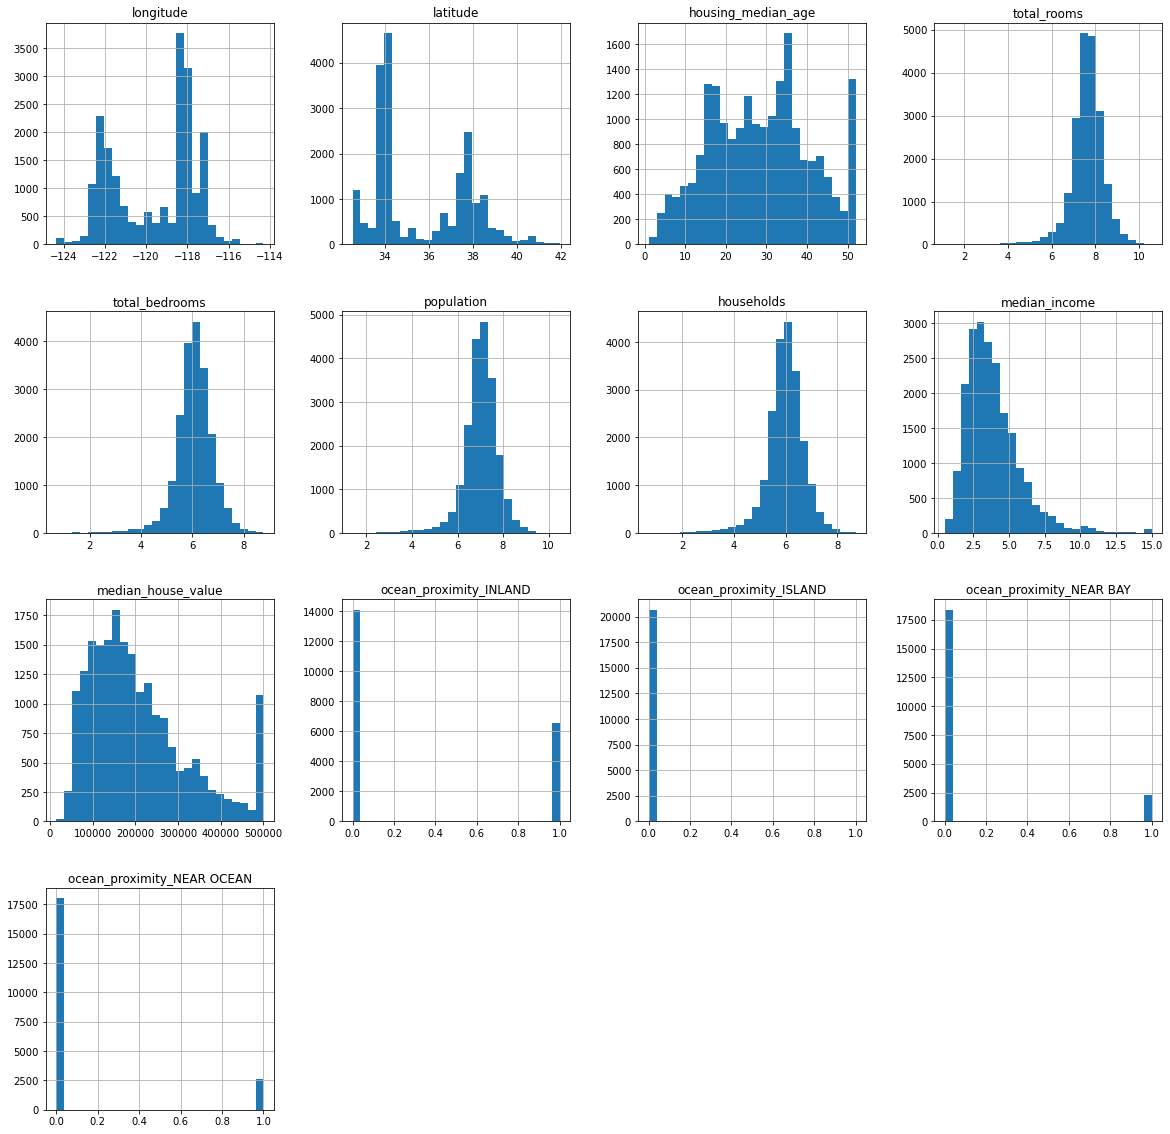

In [22]:
## Now check if the transformed features show a more normal distribution 
df.hist(figsize = (20,20), bins = 26)

## Observations: They do show a more normal distribution! 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 1440x1440 with 0 Axes>

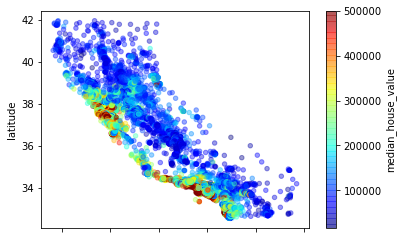

In [54]:
## Visualization of the median house prices by location 

plt.figure(figsize = (20,20))
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)

## Observations: It can be seen that the median house prices are related to the location of the house within California. It seems that 
##               the prices tend to be higher the closer the houses are to the ocean. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 1440x1440 with 0 Axes>

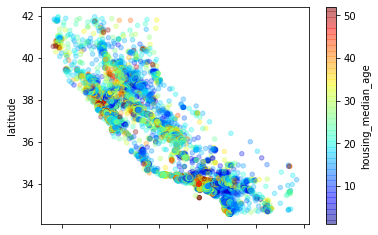

In [59]:
## Visualization of the housing median age by location
plt.figure(figsize = (20,20))
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c='housing_median_age', cmap = plt.get_cmap('jet'), colorbar=True)

## Observations: It seems that the median age of most of the houses range from less than 10 to around 30 years throughout California. 
## Although it can be seen that the very new houses seem to be more populated in the lower and middle regions of California, there does 
## not seem to be a clear pattern of the median ages of houses by location.  

<AxesSubplot:>

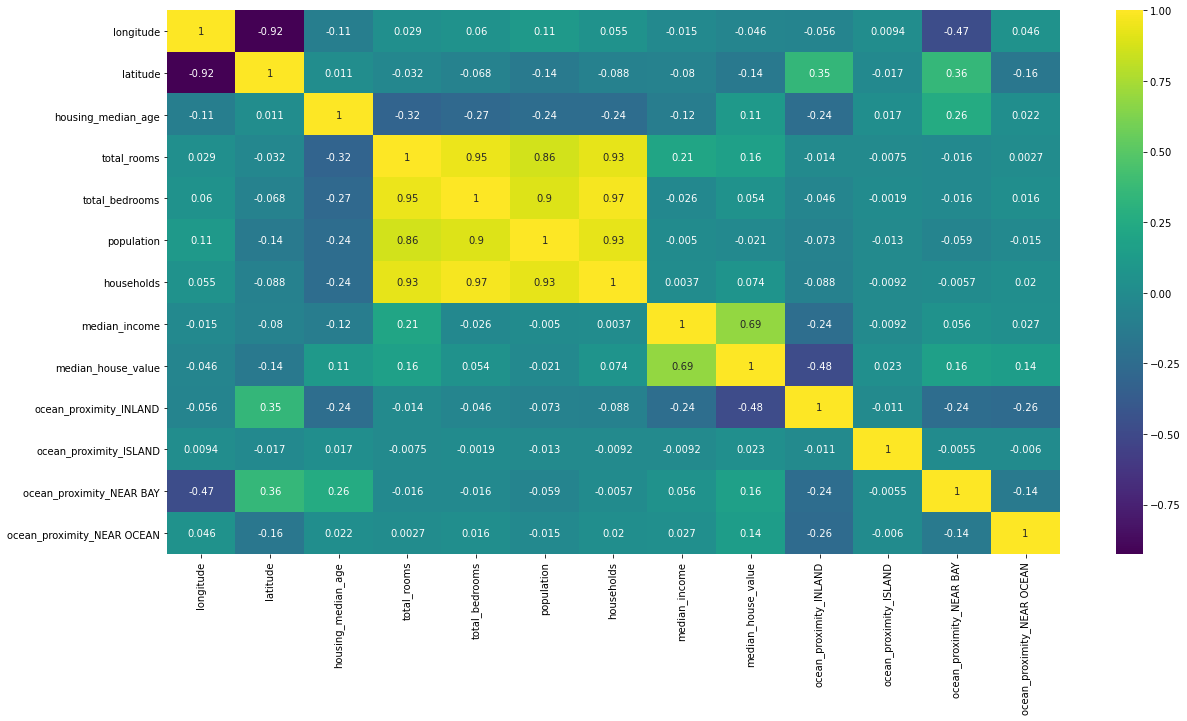

In [23]:
## Correlation plot of all the features, including the outcome variable 

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

## Observations: It seems that 'total_bedrooms', 'total_rooms', 'population', and 'households' are heavily correlated with one another, 
##               which makes sense because it is likely that the number of total bedrooms and number of total rooms in a block are 
##               closely related to one other. It also makes sense that the more populated a block is, the more households and the total
##               number of rooms and bedrooms there will be in the block. Since these correlations suggest that some of the features might
##               be redundant, I will check which feature(s) might be more important to keep. I will do so by keeping the feature(s) that 
##               has/have a stronger correlation with the outcome. Instead of completely dropping the seemingly less important correlated 
##               features, I will try to combine them and create new informative features. 

In [54]:
## Check the correlations between all the independent features and the outcome variable 
df.corr()['median_house_value'].sort_values(ascending= False)[1:]

median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
total_rooms                   0.159422
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.073612
total_bedrooms                0.054191
ocean_proximity_ISLAND        0.023416
population                   -0.021205
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [55]:
## Check the absoluate values of these correlations
np.abs(df.corr()['median_house_value']).sort_values(ascending= False)[1:]

median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_NEAR BAY      0.160284
total_rooms                   0.159422
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.073612
total_bedrooms                0.054191
longitude                     0.045967
ocean_proximity_ISLAND        0.023416
population                    0.021205
Name: median_house_value, dtype: float64

In [25]:
## Observations: It is apparent that 'median_income', 'ocean_proximity_inland', and 'ocean_proximity_near_bay' have the strongest 
##               corelations with the outcome variable. Among the correlated features, I can see that 'total_rooms' might be more
##               important than 'total_bedrooms', 'households', and 'population'. Thus, I will consider dropping these three less
##               important features. Instead, I will create new features such as 'total_rooms_per_household', 'bedrooms_per_total_rooms',
##               and 'population_per_household'. 

df['total_rooms_per_household'] = df['total_rooms']/df['households']
df['bedroom_per_total_rooms']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']

In [27]:
df1 = df.drop(['total_bedrooms', 'households', 'population'], axis = 1)

<AxesSubplot:>

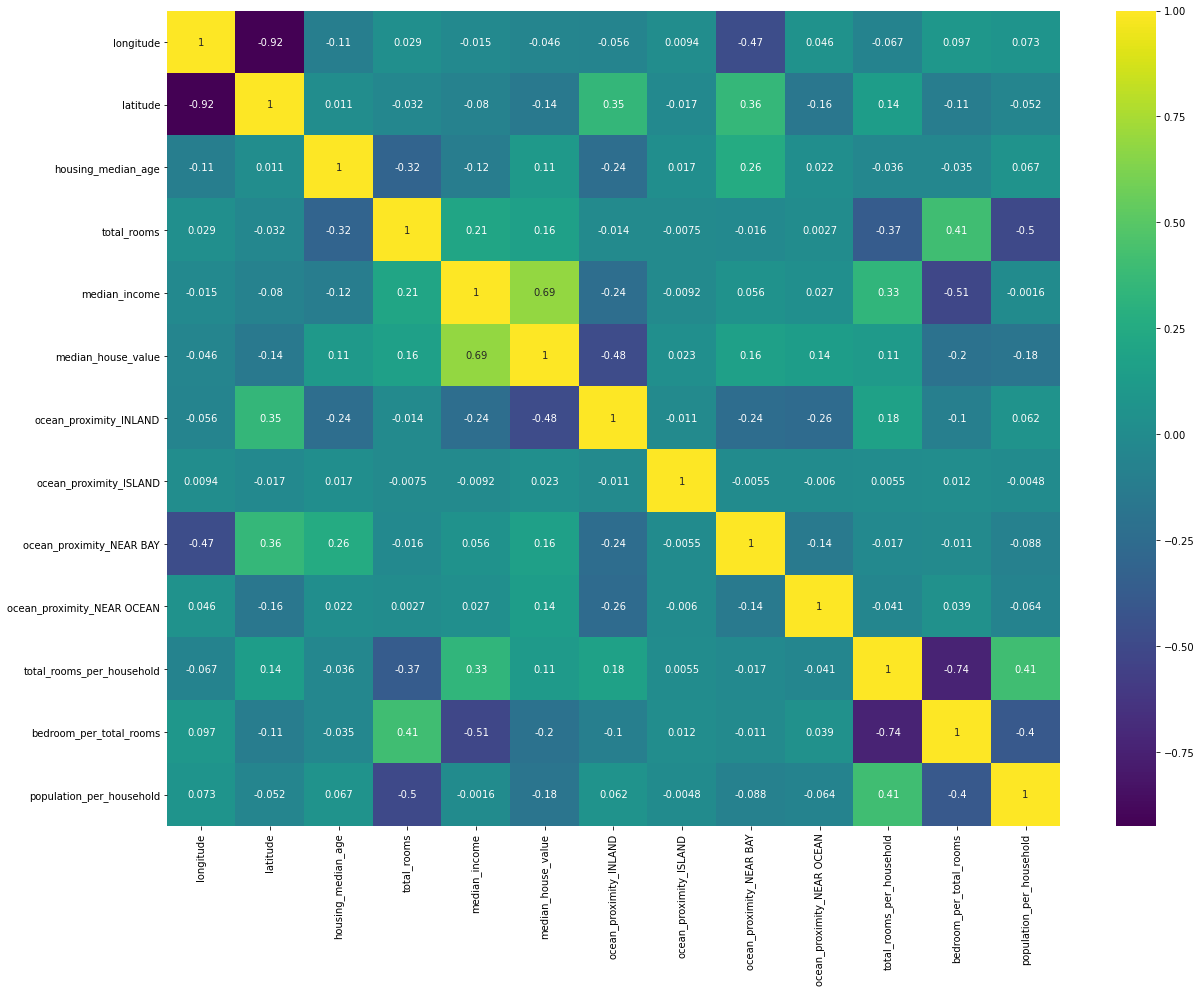

In [32]:
## Check the correlations between all the features again after dropping some features and doing feature engineering  

plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True, cmap= 'viridis')

In [96]:
## Check the correlations between all the independent features and the outcome variable again
np.abs(df1.corr()['median_house_value']).sort_values(ascending = False)[1:]

median_income                 0.688075
ocean_proximity_INLAND        0.484859
bedroom_per_total_rooms       0.198040
population_per_household      0.179463
ocean_proximity_NEAR BAY      0.160284
total_rooms                   0.159422
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
total_rooms_per_household     0.113995
housing_median_age            0.105623
longitude                     0.045967
ocean_proximity_ISLAND        0.023416
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='total_rooms_per_household', ylabel='Density'>

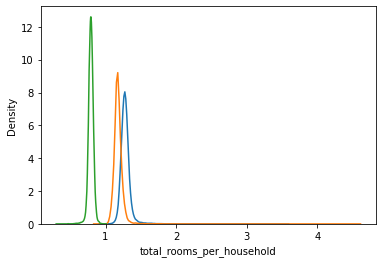

In [42]:
## Check the distributions of the newly added features 
sns.kdeplot(data = df1, x = 'total_rooms_per_household')
sns.kdeplot(data = df1, x = 'population_per_household')
sns.kdeplot(data = df1, x = 'bedroom_per_total_rooms')
## Observations: They all seem to show a normal distribution! 

In [60]:
# <Fit Machine Learning models with default parameters first and then compare them>

X= df1.drop('median_house_value', axis =1)
y = df1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [71]:
# Linear Regression

lin_model = LinearRegression()
cv = cross_val_score(lin_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-68430.68643527597

In [63]:
# KNN

from sklearn.neighbors import KNeighborsRegressor 

knn_model = KNeighborsRegressor()
cv = cross_val_score(knn_model, X_train, y_train, cv = 5, scoring= 'neg_root_mean_squared_error')

cv.mean()

-67838.35545554725

In [64]:
# SVM

from sklearn.svm import SVR

svm_model = SVR()
cv = cross_val_score(svm_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-118779.65650432007

In [65]:
# Random Forest

RF_model = RandomForestRegressor()
cv = cross_val_score(RF_model, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-50630.558090365004

In [66]:
# Gradient Boosting 

GB_model = GradientBoostingRegressor()
cv = cross_val_score(GB_model, X_train, y_train, cv= 5, scoring = 'neg_root_mean_squared_error')

cv.mean()

-52933.5911813617

In [ ]:
## Random forest showed the lowest root mean squared error. Now, I will see if I can improve the model by tuning it. 

In [74]:
# Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 150], 
              'max_depth': [26, 30, 42]}

grid = GridSearchCV(RF_model, param_grid, scoring = 'neg_root_mean_squared_error')
grid.fit(scaled_X_train, y_train)

grid.best_score_

-50594.15673246699

In [77]:
grid.best_params_ ## The best parameters selected for this model 

{'max_depth': 26, 'n_estimators': 150}

In [85]:
## Check the feature importances 

grid.best_estimator_.feature_importances_

array([6.02945663e-02, 5.76598167e-02, 5.56974010e-02, 2.72681880e-02,
       4.86311679e-01, 1.38610323e-01, 1.67395073e-04, 1.00594492e-03,
       3.63838653e-03, 3.00361738e-02, 2.51174679e-02, 1.14192658e-01])

In [98]:
feature_importance_df = pd.DataFrame(grid.best_estimator_.feature_importances_, index = X.columns, columns = ['importance'])
feature_importance_df_s = feature_importance_df.sort_values('importance', ascending = False)

feature_importance_df_s


,importance
median_income,0.486312
ocean_proximity_INLAND,0.138610
population_per_household,0.114193
longitude,0.060295
latitude,0.057660
housing_median_age,0.055697
total_rooms_per_household,0.030036
total_rooms,0.027268
bedroom_per_total_rooms,0.025117
ocean_proximity_NEAR OCEAN,0.003638


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'median_income'),
  Text(1, 0, 'ocean_proximity_INLAND'),
  Text(2, 0, 'population_per_household'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'latitude'),
  Text(5, 0, 'housing_median_age'),
  Text(6, 0, 'total_rooms_per_household'),
  Text(7, 0, 'total_rooms'),
  Text(8, 0, 'bedroom_per_total_rooms'),
  Text(9, 0, 'ocean_proximity_NEAR OCEAN'),
  Text(10, 0, 'ocean_proximity_NEAR BAY'),
  Text(11, 0, 'ocean_proximity_ISLAND')])

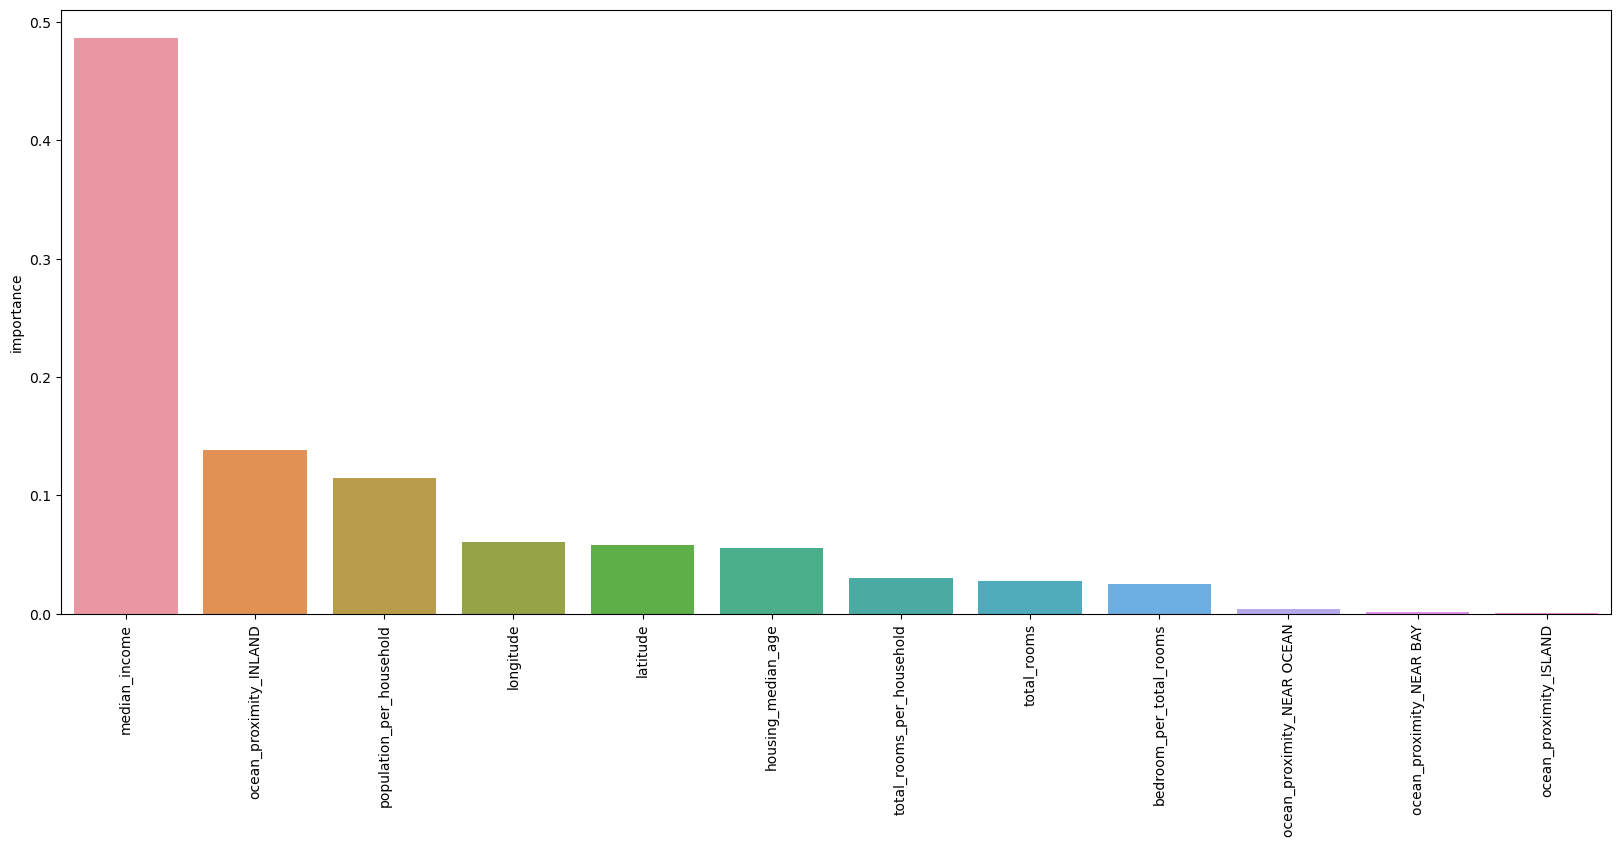

In [99]:
## Create a feature importance plot 

plt.figure(figsize = (20,8), dpi = 100)
sns.barplot(data = feature_importance_df_s, x = feature_importance_df_s.index, y = 'importance')
plt.xticks(rotation= 90)

In [81]:
## Now check the R^2 and RMSE values of the model using test data 
y_pred = grid.predict(scaled_X_test)

from sklearn.metrics import r2_score, mean_squared_error

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [82]:
R2

0.8081779130876843

In [83]:
RMSE

50136.35257124362